In [14]:
import os
import sys 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [10]:
model = keras.models.load_model("../SEQ/sequential.keras")
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,157,024 (27.30 MB)

 Trainable params: 2,385,674 (9.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,771,350 (18.20 MB)

In [15]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_test = x_test.astype("float32") / 255.0

print(x_test.shape)
print(y_test.shape)

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)


(10000, 28, 28)
(10000,)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [16]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9828 - loss: 0.0746
Loss: 0.07463821768760681
Accuracy: 0.9828000068664551
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.95      0.99      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



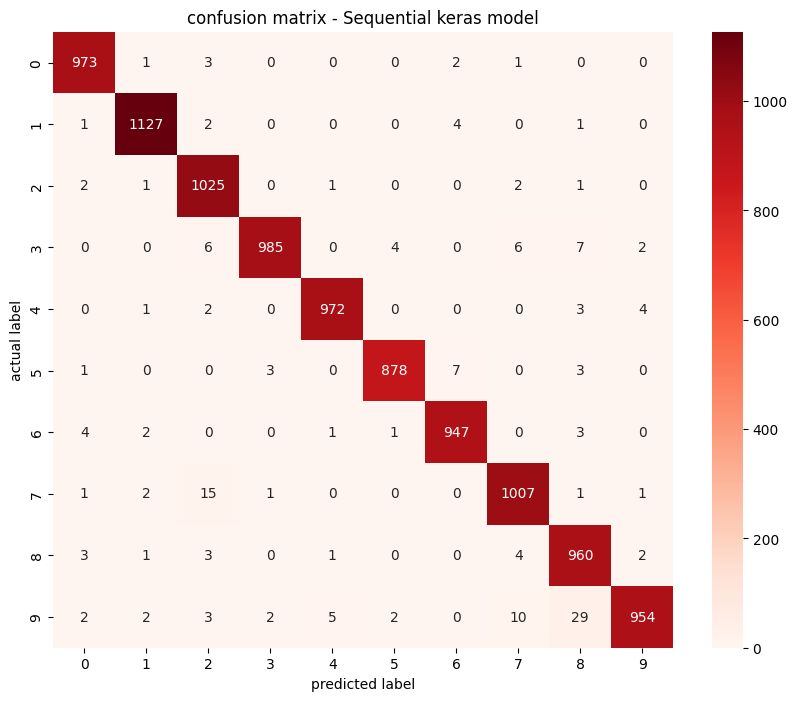

In [17]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')
plt.title('confusion matrix - Sequential keras model')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.show()

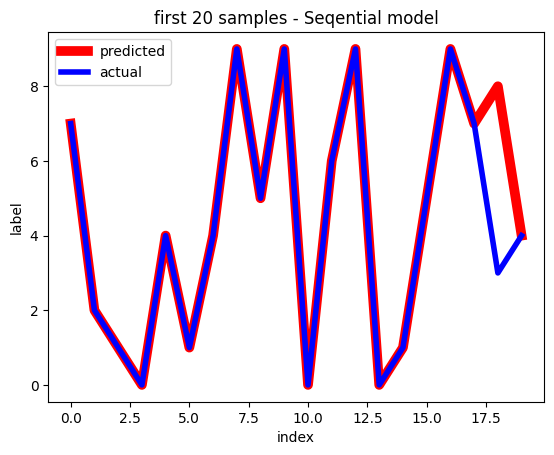

In [18]:
plt.plot(y_pred[:20], 'red', label='predicted', linewidth=7)
plt.plot(y_test[:20], 'blue', label='actual', linewidth=4)
plt.title('first 20 samples - Seqential model')
plt.xlabel('index')
plt.ylabel('label')
plt.legend()
plt.show()

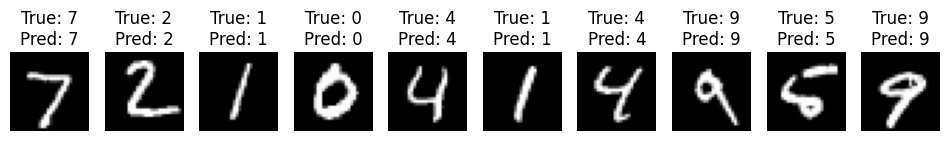

In [19]:
def sample(images, true_labels, pred_labels, n=10):
    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPred: {pred_labels[i]}")
        plt.axis('off')
    plt.show()
    
sample(x_test, y_test, y_pred)

595


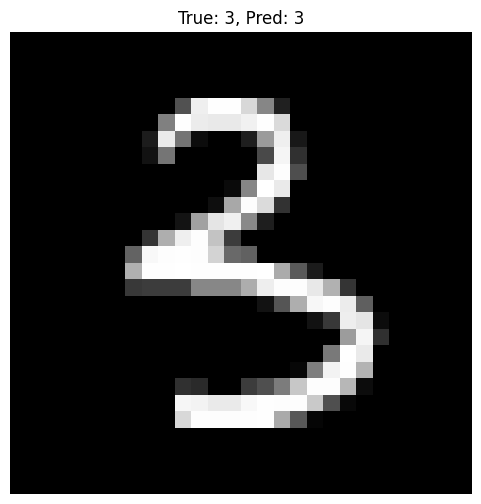

In [20]:
target = np.random.choice(len(x_test), 1, replace=False)
print(target[0])

plt.figure(figsize=(6, 6))
plt.imshow(x_test[target[0]], cmap="gray")
plt.title(f"True: {y_test[target[0]]}, Pred: {y_pred[target[0]]}")
plt.axis('off')
plt.show()